# 1)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PRML lab data /Lab 6/glass.csv')
df

,Id number,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


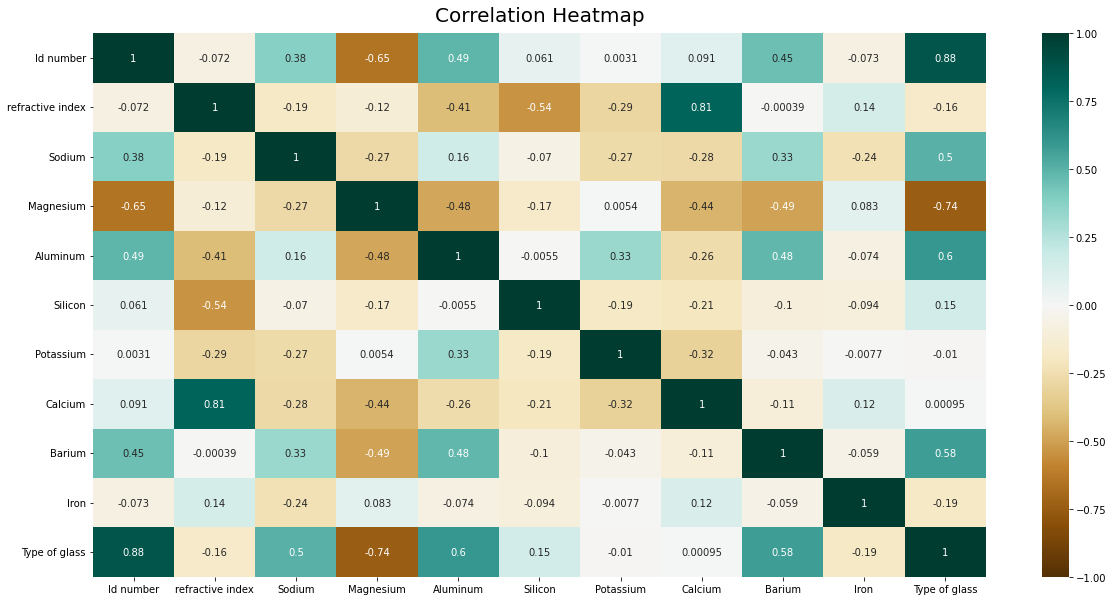

In [ ]:
corr = df.corr()
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

In [ ]:
df = df.drop(columns=['Calcium','Id number'],axis =1)
df

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Barium,Iron,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,1.57,0.0,7


<Figure size 720x720 with 0 Axes>

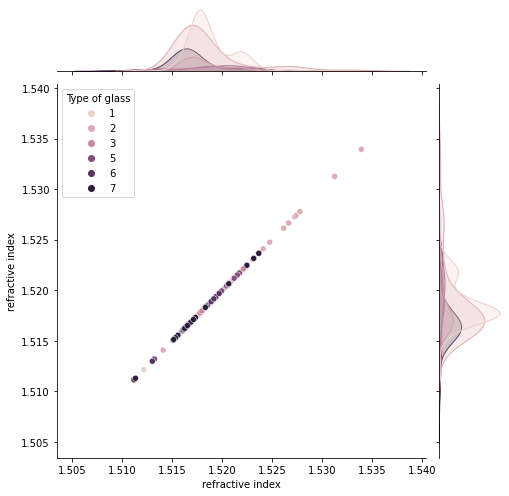

<Figure size 720x720 with 0 Axes>

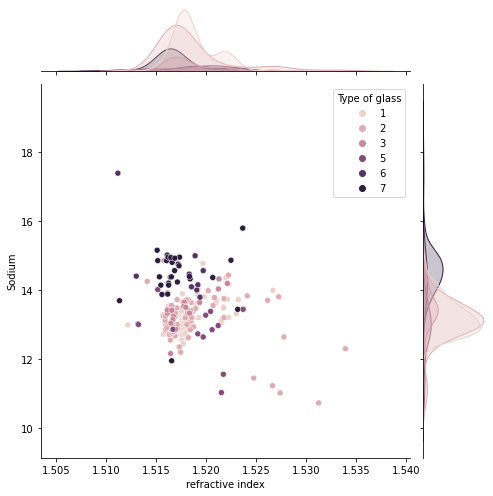

<Figure size 720x720 with 0 Axes>

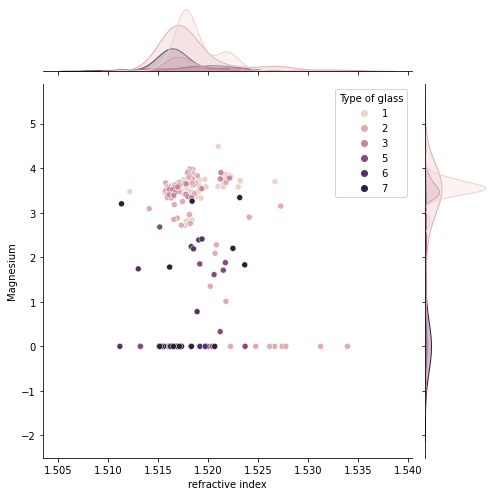

<Figure size 720x720 with 0 Axes>

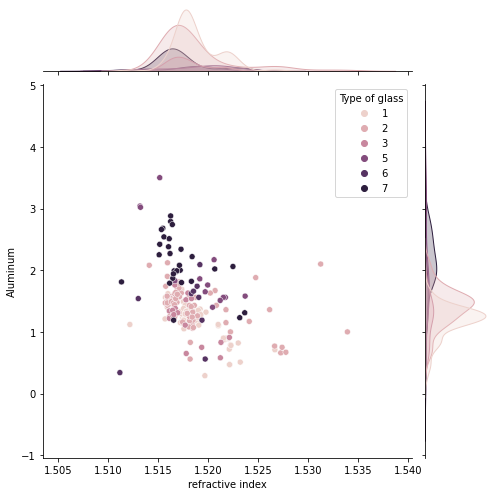

<Figure size 720x720 with 0 Axes>

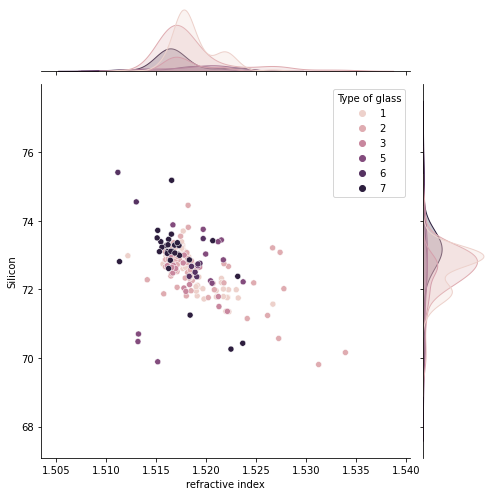

<Figure size 720x720 with 0 Axes>

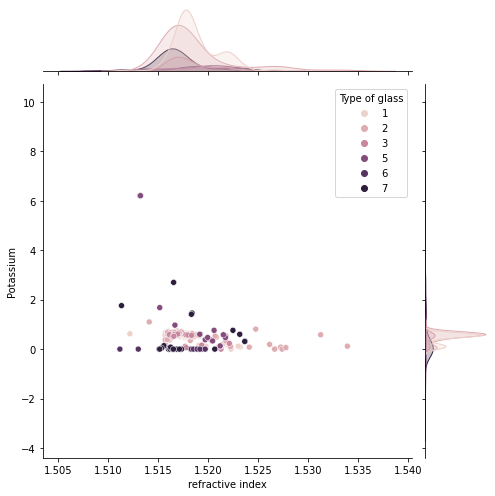

<Figure size 720x720 with 0 Axes>

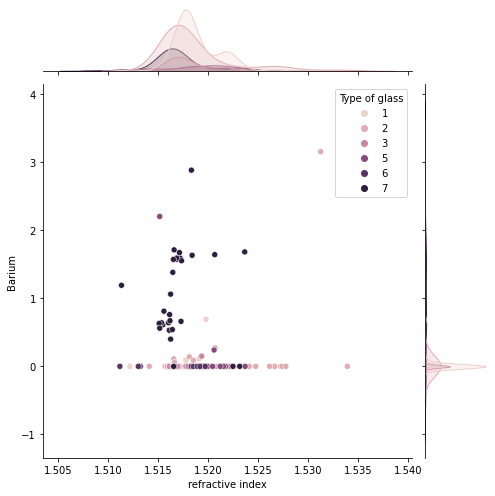

<Figure size 720x720 with 0 Axes>

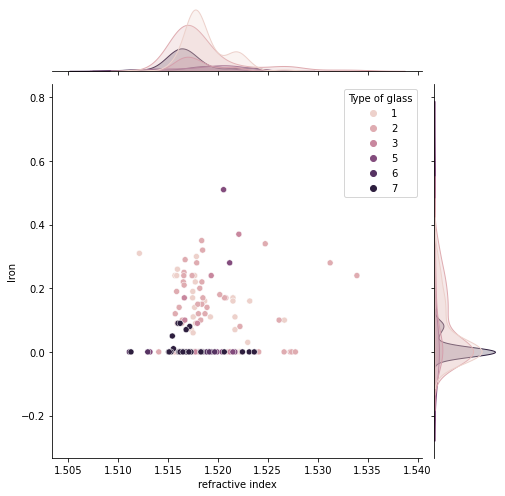

In [ ]:
for i in df.columns:
  if i != "Type of glass" :
    plt.figure(figsize=(10, 10))
    g = sns.jointplot(x="refractive index",
               y=i,
               hue="Type of glass",
               height=7,
               data=df)

In [ ]:
X_ = normalize(df)
X_ = pd.DataFrame(X_)
X_

,0,1,2,3,4,5,6,7,8
0,0.020769,0.186254,0.061311,0.015021,0.980156,0.000819,0.000000,0.0,0.013655
1,0.020462,0.187277,0.048538,0.018337,0.980608,0.006472,0.000000,0.0,0.013483
2,0.020390,0.181959,0.047742,0.020711,0.981610,0.005245,0.000000,0.0,0.013449
3,0.020528,0.178683,0.049912,0.017449,0.982147,0.007710,0.000000,0.0,0.013526
4,0.020396,0.178366,0.048657,0.016667,0.982288,0.007393,0.000000,0.0,0.013441
...,...,...,...,...,...,...,...,...,...
209,0.020384,0.190096,0.000000,0.038718,0.976160,0.001076,0.014251,0.0,0.094107
210,0.020237,0.199054,0.000000,0.026549,0.974726,0.000000,0.021213,0.0,0.093390
211,0.020222,0.190962,0.000000,0.026862,0.976352,0.000000,0.021809,0.0,0.093087
212,0.020117,0.190757,0.000000,0.025735,0.976467,0.000000,0.020827,0.0,0.092858


In [ ]:
X = X_.drop(columns=[8],axis=1)
X

,0,1,2,3,4,5,6,7
0,0.020769,0.186254,0.061311,0.015021,0.980156,0.000819,0.000000,0.0
1,0.020462,0.187277,0.048538,0.018337,0.980608,0.006472,0.000000,0.0
2,0.020390,0.181959,0.047742,0.020711,0.981610,0.005245,0.000000,0.0
3,0.020528,0.178683,0.049912,0.017449,0.982147,0.007710,0.000000,0.0
4,0.020396,0.178366,0.048657,0.016667,0.982288,0.007393,0.000000,0.0
...,...,...,...,...,...,...,...,...
209,0.020384,0.190096,0.000000,0.038718,0.976160,0.001076,0.014251,0.0
210,0.020237,0.199054,0.000000,0.026549,0.974726,0.000000,0.021213,0.0
211,0.020222,0.190962,0.000000,0.026862,0.976352,0.000000,0.021809,0.0
212,0.020117,0.190757,0.000000,0.025735,0.976467,0.000000,0.020827,0.0


## a)

### Implementing K Means 

In [ ]:
kmeans = KMeans(n_clusters = 3,n_init=20)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=20)

In [ ]:
clusters = kmeans.predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### Cluster Centers

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[2.03852629e-02, 1.86676095e-01, 2.93368873e-03, 2.38831811e-02,
        9.78524423e-01, 3.01868449e-03, 8.60560528e-03, 6.82494811e-04],
       [2.05323720e-02, 1.79387528e-01, 4.65189890e-02, 1.79476190e-02,
        9.81670354e-01, 6.85283308e-03, 5.61996199e-04, 8.07790989e-04],
       [2.09293887e-02, 1.79946046e-01, 0.00000000e+00, 4.19091873e-02,
        9.76352681e-01, 8.58926745e-02, 0.00000000e+00, 0.00000000e+00]])

### Visualising Cluater Centers by choosing two features 

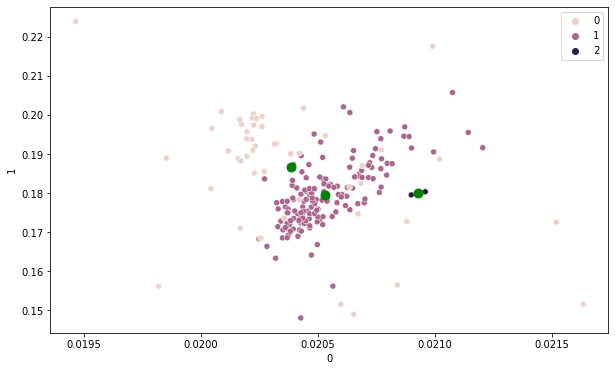

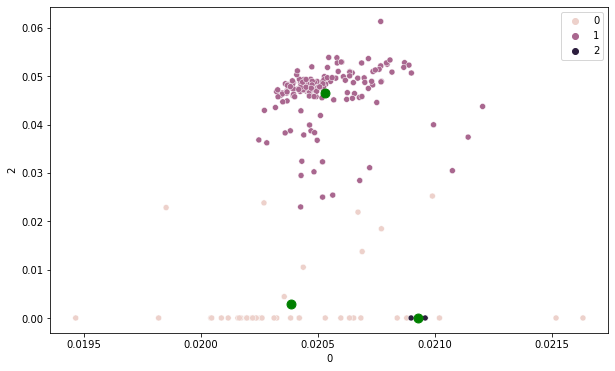

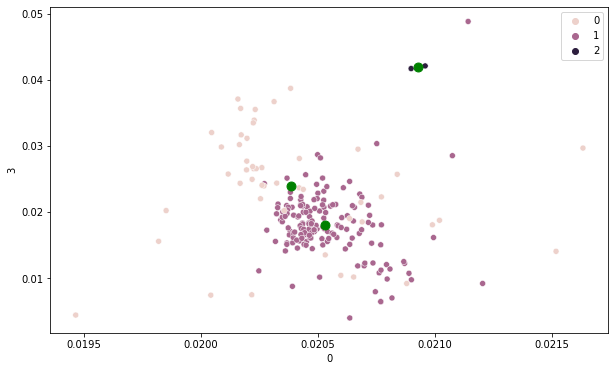

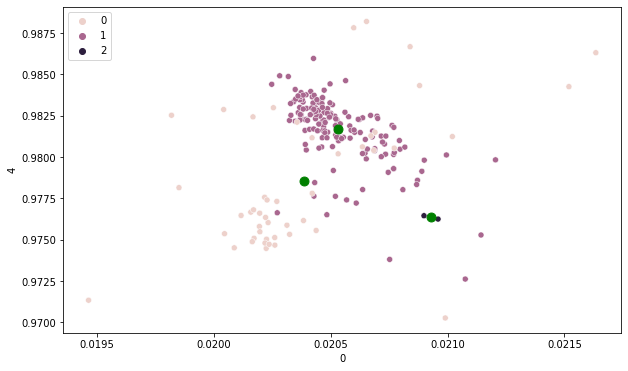

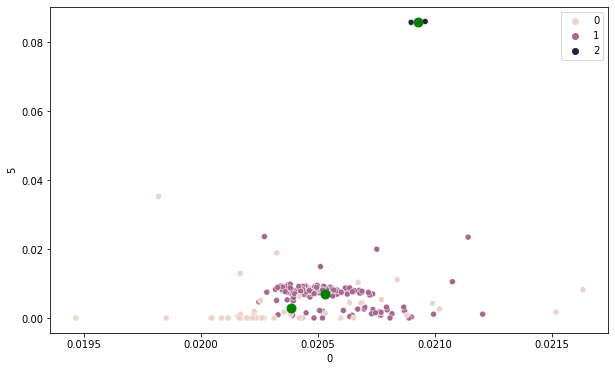

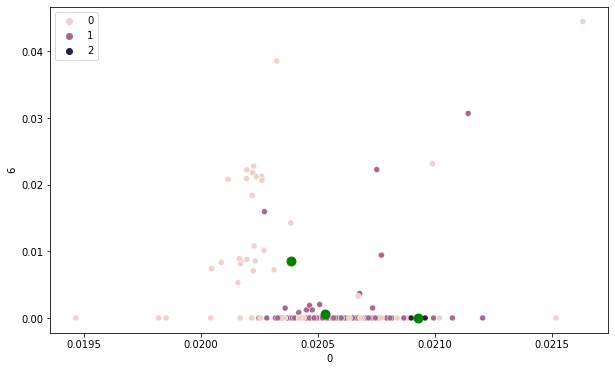

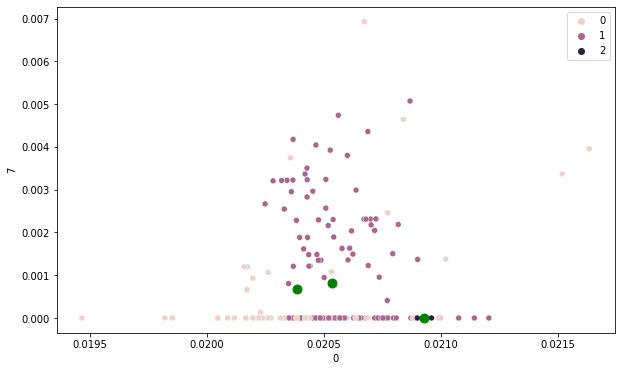

In [ ]:
for i in range(1,8):
    plt.figure(figsize=(10, 6))
    g = sns.scatterplot(x=0,
                  y=i,
                  hue=clusters,
                  data=X)
    plt.scatter(centers[0][0],centers[0][i],c ='green',s=80)
    plt.scatter(centers[1][0],centers[1][i],c ='green',s=80)
    plt.scatter(centers[2][0],centers[2][i],c ='green',s=80)
    plt.show()

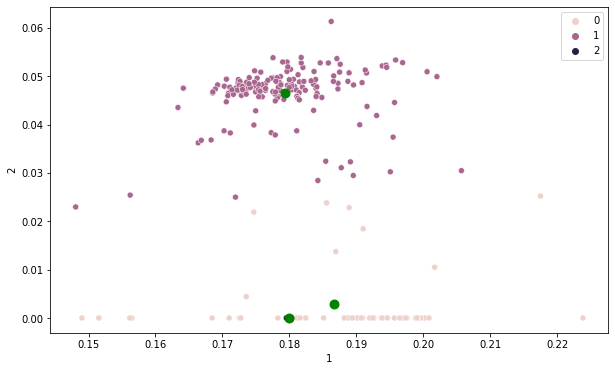

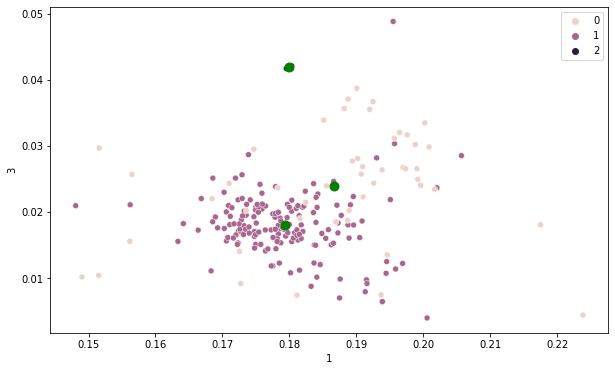

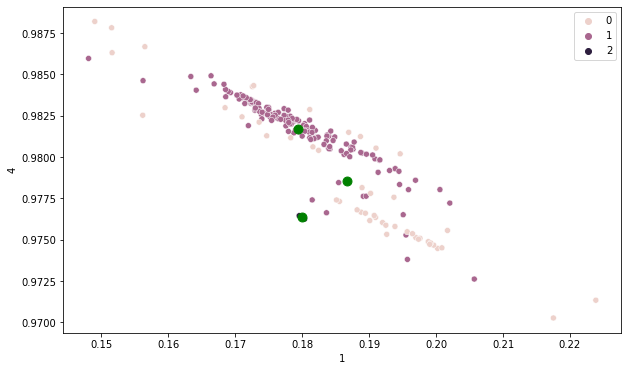

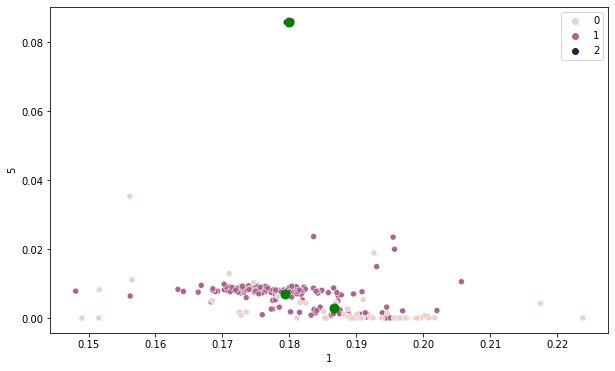

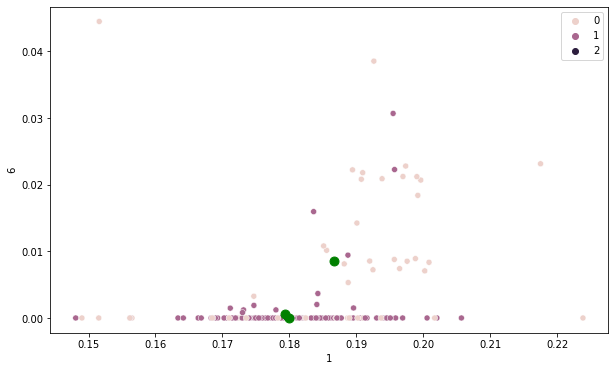

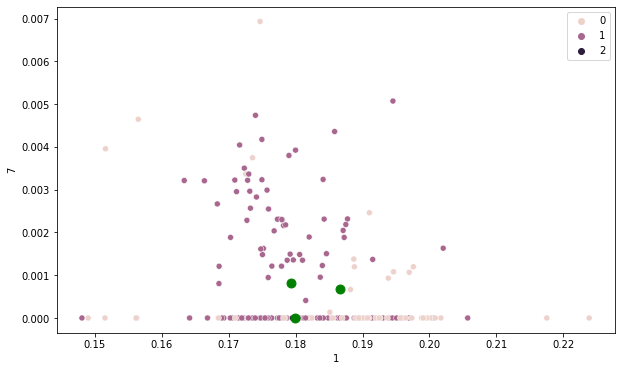

In [ ]:
for i in range(2,8):
    plt.figure(figsize=(10, 6))
    g = sns.scatterplot(x=1,
                  y=i,
                  hue=clusters,
                  data=X)
    plt.scatter(centers[0][1],centers[0][i],c ='green',s=80)
    plt.scatter(centers[1][1],centers[1][i],c ='green',s=80)
    plt.scatter(centers[2][1],centers[2][i],c ='green',s=80)
    plt.show()

## b) Silhouette Score & 

In [ ]:
variance = []
no_of_clusters = []
Silhouette = []
for i in range(2,15):
    no_of_clusters.append(i)
    kmeans = KMeans(n_clusters = i,n_init=1000)
    kmeans.fit(X)
    variance.append(kmeans.inertia_)
    S = silhouette_score(X,kmeans.labels_)
    print("The silhouette score for k =",str(kmeans.n_clusters)," is :",S)
    Silhouette.append(S)

The silhouette score for k = 2  is : 0.633911788706452
The silhouette score for k = 3  is : 0.6451688601633173
The silhouette score for k = 4  is : 0.6203941177676084
The silhouette score for k = 5  is : 0.4057598889079089
The silhouette score for k = 6  is : 0.4286472532333569
The silhouette score for k = 7  is : 0.4225192167877065
The silhouette score for k = 8  is : 0.43120580006337406
The silhouette score for k = 9  is : 0.44224660327488274
The silhouette score for k = 10  is : 0.442492840643803
The silhouette score for k = 11  is : 0.3228734032177546
The silhouette score for k = 12  is : 0.32390021669549546
The silhouette score for k = 13  is : 0.32334244459984174
The silhouette score for k = 14  is : 0.3205809394942392


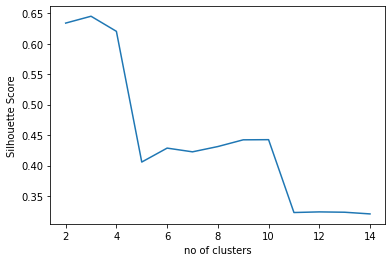

In [ ]:
plt.plot(no_of_clusters,Silhouette)
plt.xlabel("no of clusters")
plt.ylabel("Silhouette Score")
plt.show()

The Silhouette Score is maximum for k = 3 i.e. 0.6451.

## c) Elbow Method

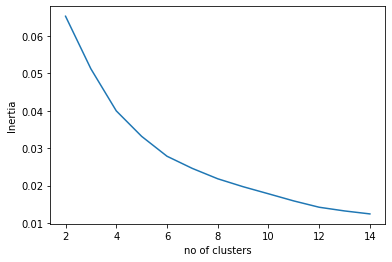

In [ ]:
plt.plot(no_of_clusters,variance)
plt.xlabel("no of clusters")
plt.ylabel("Inertia")
plt.show()

## d) Bagging Classifier with KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Type of glass'], test_size=0.3, random_state=4)
acc_test=[]
acc_train=[]
k = []
for i in range(1,4):
  k.append(i)
  bagging = BaggingClassifier(KNN(n_neighbors=i))
  bagging.fit(X_train,y_train)
  x_ = bagging.score(X_train,y_train)
  x = bagging.score(X_test,y_test)
  acc_test.append(x)
  acc_train.append(x_)

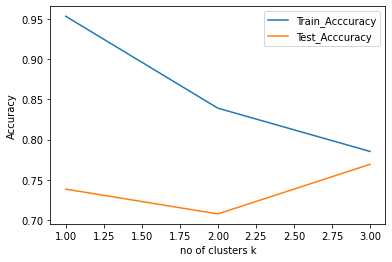

In [ ]:
# plt.figure(figsize=(15, 8))
plt.plot(k,acc_train, label = 'Train_Acccuracy')
plt.plot(k,acc_test, label = 'Test_Acccuracy')
plt.xlabel("no of clusters k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

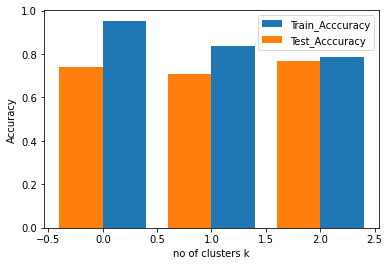

In [ ]:
# plt.figure(figsize=(15, 8))
k1 = np.arange(len(k))
plt.bar(k1+0.2,acc_train,0.4, label = 'Train_Acccuracy')
plt.bar(k1-0.2,acc_test,0.4, label = 'Test_Acccuracy')
plt.xlabel("no of clusters k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 2) Implementing K Means Clustering From scratch

Loading the data

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

Flattening the data

In [ ]:
df1 = pd.DataFrame(data=faces.data)
df1['target'] = faces.target
df1

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


In [ ]:
X_ = df1.drop(columns=['target'], axis=1)
y_ = df1['target']

In [ ]:
X_

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


## a) & b)

In [ ]:
class KMeans_Cluster:
  def __init__(self,k,init_centers,max_iter=200):
    self.k = k
    self.max_iter = max_iter
    self.centriods = init_centers
    self.cluster = []

  def _norm(self,v1,v2):
    return  np.linalg.norm(v1-v2)

  def fit(self,X):

    for i in range(self.max_iter):
      self.cluster = []
      for j in range(len(X)):
        row_clust = []
        for k in range(self.k):
          v1 = self.centriods.loc[k]
          v2 = X.loc[j]
          norm = self._norm(v2,v1)
          row_clust.append(norm)
        min_idx = row_clust.index(min(row_clust))
        self.cluster.append(min_idx)
      
      new_centriods = []
      for j in range(len(self.centriods)):
        idx = np.where(np.array(self.cluster) == j)
        idx=idx[0]
        mean = np.mean(X.values[idx],axis =0)
        new_centriods.append(list(mean))

      if(np.allclose(np.array(new_centriods),self.centriods,rtol = 1e-4)):
        break

      self.centriods = pd.DataFrame(new_centriods)

  def predict(self,X):
    cluster = []
    for j in range(len(X)):
      row_clust = []
      for k in range(self.k):
        v1 = self.centriods.loc[k]
        v2 = X.loc[j]
        norm = self._norm(v2,v1)
        row_clust.append(norm)
      min_idx = row_clust.index(min(row_clust))
      cluster.append(min_idx)

    return cluster


In [ ]:
def freq_of_datapoints_in_clusters(k_model):
  count = []
  x = []
  for i in range(k_model.k):
    x.append(i)
    lst_cluster=list(k_model.cluster).count(i)
    count.append(lst_cluster)

  plt.bar(x,count)
  plt.xlabel("cluster")
  plt.ylabel("count")
  plt.show()

In [ ]:
def visualize_clusters_centriods(k_model):
        plt.figure(figsize=(8, 3*k_model.k))
        for i in range(k_model.k):
            plt.subplot(k_model.k, 1, i+1)
            cluster_center = np.array(k_model.centriods.loc[i]).reshape(64,64)
            plt.imshow(cluster_center)
            plt.title("Cluster center for cluster {}".format(i))
            plt.colorbar()
        plt.tight_layout()
        plt.show()

In [ ]:
def visualize_clusters(k_model, X):
    num_samples = 10
    plt.figure(figsize=(15, 7*k_model.k))
    for i in range(k_model.k):
        cluster_indices = np.where(np.array(k_model.cluster) == i)[0]
        num_samples_in_cluster = len(cluster_indices)
        if num_samples_in_cluster > 0:
            num_samples_to_display = min(num_samples, num_samples_in_cluster)
            random_indices = np.random.choice(cluster_indices, num_samples_to_display, replace=False)
            for j, index in enumerate(random_indices):
                plt.subplot(k_model.k, num_samples_to_display, num_samples_to_display*(i+1) - num_samples_to_display + j + 1)
                sample_image = np.array(X.loc[index]).reshape(64,64)
                plt.imshow(sample_image)
                plt.title("Sample {}".format(j+1))
                plt.axis("off")
                
    plt.tight_layout()
    plt.show()


In [ ]:
def calculate_sse(k_model, X):
    sse = 0
    for i in range(k_model.k):
        cluster_indices = np.where(np.array(k_model.cluster) == i)
        cluster_indices= cluster_indices[0]
        cluster_center = np.array(k_model.centriods.loc[i])
        distance_sum = np.sum(np.linalg.norm(X.loc[cluster_indices] - cluster_center, axis=1))
        sse += distance_sum**2
    return sse

In [ ]:
test = X_.sample(40,axis=0)
test = test.reset_index()
test = test.drop(columns=['index'],axis=1)

In [ ]:
K = KMeans_Cluster(k=40,init_centers=test)
K.fit(X_)
a=K.predict(X_)
a = np.array(a).transpose()
print("prediction on Dataset are: ")
print(a)

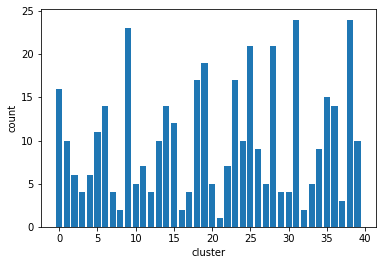

In [ ]:
freq_of_datapoints_in_clusters(K)

In [ ]:
visualize_clusters_centriods(K)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
visualize_clusters(K,X_)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X_classwise = []
for i in range(0,400,10):
  X_classwise.append(X_.values[i])

X_classwise = np.array(X_classwise)
X_classwise = pd.DataFrame(X_classwise)
X_classwise

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.541322,0.586777,0.640496,0.661157,0.685950,0.685950,0.690083,0.698347,0.694215,0.690083,...,0.483471,0.483471,0.495868,0.512397,0.528926,0.363636,0.111570,0.095041,0.111570,0.111570
2,0.578512,0.603306,0.632231,0.665289,0.677686,0.710744,0.723140,0.739669,0.739669,0.743802,...,0.157025,0.177686,0.194215,0.198347,0.206612,0.194215,0.165289,0.177686,0.161157,0.152893
3,0.169421,0.264463,0.219008,0.280992,0.421488,0.549587,0.669421,0.702479,0.706612,0.731405,...,0.429752,0.425620,0.438017,0.438017,0.454545,0.363636,0.198347,0.210744,0.235537,0.214876
4,0.454545,0.429752,0.537190,0.611570,0.652893,0.702479,0.727273,0.735537,0.735537,0.735537,...,0.367769,0.359504,0.380165,0.384298,0.388430,0.376033,0.409091,0.409091,0.384298,0.384298
5,0.719008,0.727273,0.723140,0.714876,0.723140,0.731405,0.739669,0.760331,0.780992,0.793388,...,0.516529,0.500000,0.438017,0.566116,0.743802,0.566116,0.314050,0.301653,0.338843,0.322314
6,0.206612,0.280992,0.367769,0.392562,0.681818,0.714876,0.723140,0.739669,0.752066,0.768595,...,0.524793,0.537190,0.537190,0.636364,0.285124,0.235537,0.231405,0.252066,0.243802,0.272727
7,0.185950,0.194215,0.322314,0.524793,0.661157,0.772727,0.822314,0.838843,0.842975,0.842975,...,0.289256,0.285124,0.268595,0.243802,0.239669,0.219008,0.202479,0.190083,0.194215,0.202479
8,0.500000,0.487603,0.537190,0.574380,0.595041,0.595041,0.628099,0.644628,0.661157,0.661157,...,0.272727,0.264463,0.268595,0.276859,0.227273,0.239669,0.264463,0.293388,0.293388,0.280992
9,0.326446,0.483471,0.524793,0.599174,0.665289,0.702479,0.702479,0.710744,0.731405,0.731405,...,0.404959,0.380165,0.305785,0.185950,0.090909,0.086777,0.074380,0.082645,0.066116,0.078512


In [ ]:
K2 = KMeans_Cluster(k=40,init_centers=X_classwise)
K2.fit(X_)
a=K2.predict(X_)
a = np.array(a).transpose()
print(a)

[ 0 17  0 37 17 37  0  0  0 39  1  1  1  1  1  1  1  1  1  1  2  2  2 30
 30  4  4 37 17 17  3  3  3 22 17 37 22  3  3 17  4 29 29  4 37 37  4  4
 37 22  5  5  5  5  5  5  5  5  5  5  6  6 22  6  6 22  6  6 22  6  7  7
  0  7  0  0  7  0 37  7  8  8  8  8  8  4  4  4  8 39  9  9 39 39 11 39
 39  9 37  0 10 10 10 10 10 10 10 10 10 10 11  8  8  8  8 11  8 11 11 11
 12 12 12 12 12 17 37 37 22 12 13 13 13 13 13 13 13 13 13 13 14 12 14 14
 12 14 12 14 12 12 15  0  0 22 22 15 17 37  0  0 16 16  2  2 16 37 37 16
 37 37 17 17 22 17 22 22 17 22 17 22 18 18 18 10 10 18 10 10 10 18 19 19
 19  3  3  3  3  3  3 19 29 30 30 30 29 29 30 30 29 30 21 21 21 21 21 21
 21 21 21 21 22 17  8  4 24  4  8 17 22 22 23 23 23 23 29 23 23 23 23 23
 24 24 24 24  4 24 24  4 24 24  2  4  2  2  2  2 22  2  2 24 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 30
 28 28 29 29 29 29 29 29 29 29 29 29 30 20 20 20 20 30 29 30 30 20 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

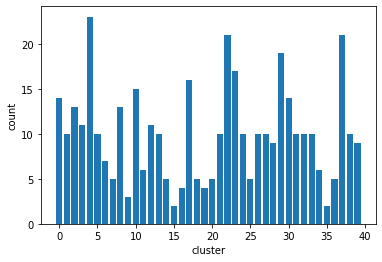

In [ ]:
freq_of_datapoints_in_clusters(K2)

In [ ]:
visualize_clusters_centriods(K2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
visualize_clusters(K2,X_)

Output hidden; open in https://colab.research.google.com to view.

* "**np.allclose(self.centers, new_centers)**" is a NumPy function that checks if all elements of two arrays are equal within a certain tolerance. In the context of the k-means algorithm, it is used to check whether the cluster centers have moved significantly between two iterations. If the difference between the old and new centers is smaller than a certain threshold, it means that the algorithm has converged and we can stop iterating. The function returns True if all elements of self.centers and new_centers are within the **default tolerance of 1e-08**, and False otherwise.


---


In [ ]:
sse_1 = calculate_sse(K, X_)
sse_2 = calculate_sse(K2, X_)

print("SSE for part 1: ", sse_1)
print("SSE for part 2: ", sse_2)

SSE for part 1:  197691.42611971736
SSE for part 2:  162071.51258567243


# 3)

## a)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/PRML lab data /Lab 6/Wholesale customers data.csv')
df2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


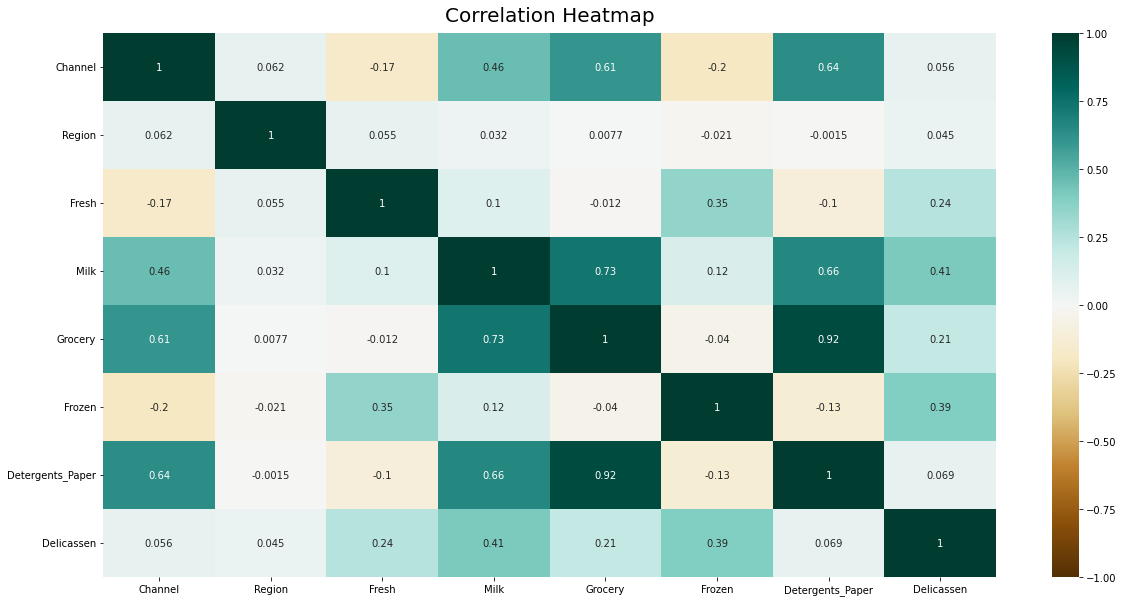

In [ ]:
corr2 = df2.corr()
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(corr2, vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

In [ ]:
XW = df2.drop(columns = ['Channel','Region'],axis = 1)

In [ ]:
for i in XW.columns:
  M = max(XW[i])
  m = min(XW[i])
  temp = []
  for j in range(len(XW[i])):
    temp.append(float(XW[i][j]-m)/(M-m))

  XW[i] = temp

XW

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...
435,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


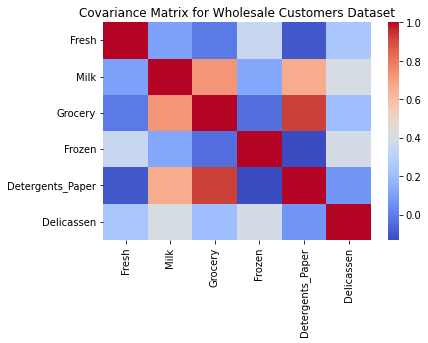

In [ ]:
sns.heatmap(XW.corr(), cmap='coolwarm')
plt.title("Covariance Matrix for Wholesale Customers Dataset")
plt.show()

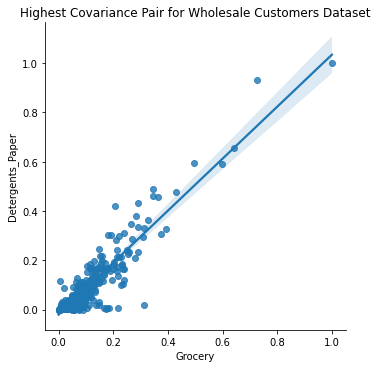

In [ ]:
sns.lmplot(x='Grocery', y='Detergents_Paper', data=XW )
plt.title("Highest Covariance Pair for Wholesale Customers Dataset")
plt.show()

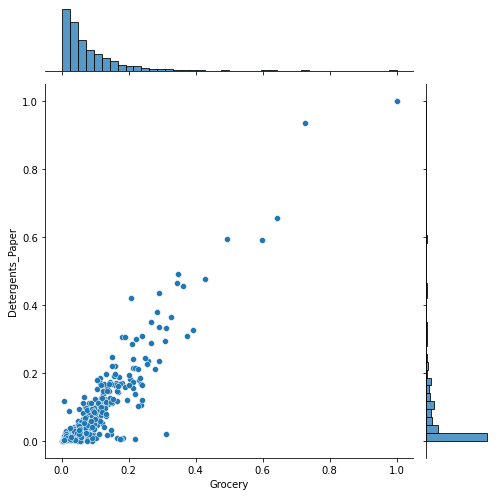

In [ ]:
g = sns.jointplot(x="Grocery",
               y="Detergents_Paper",
               kind='scatter',
               hue = None,
               height=7,
               data=XW)

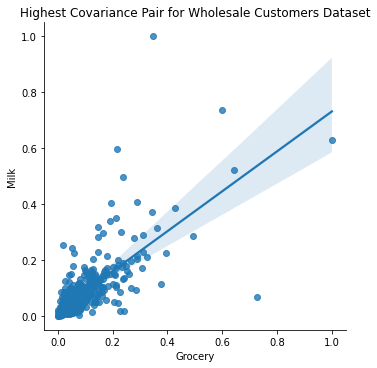

In [ ]:
sns.lmplot(x='Grocery', y='Milk', data=XW )
plt.title("Highest Covariance Pair for Wholesale Customers Dataset")
plt.show()

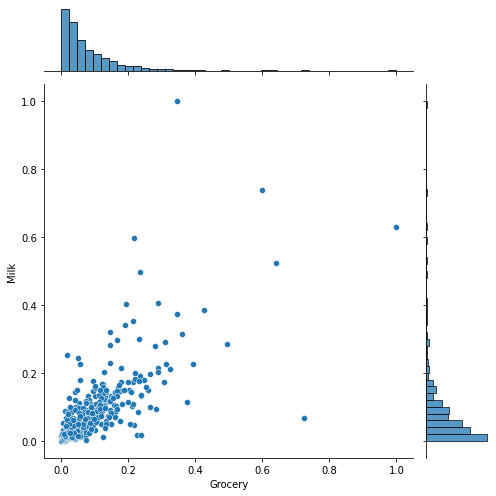

In [ ]:
g = sns.jointplot(x="Grocery",
               y="Milk",
               kind='scatter',
               hue = None,
               height=7,
               data=XW)

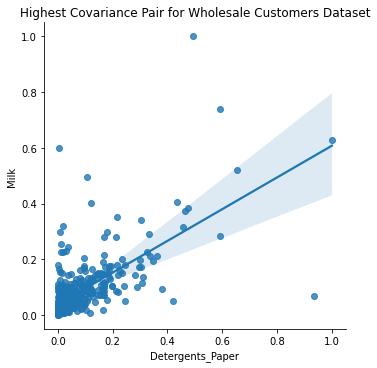

In [ ]:
sns.lmplot(x='Detergents_Paper', y='Milk', data=XW )
plt.title("Highest Covariance Pair for Wholesale Customers Dataset")
plt.show()

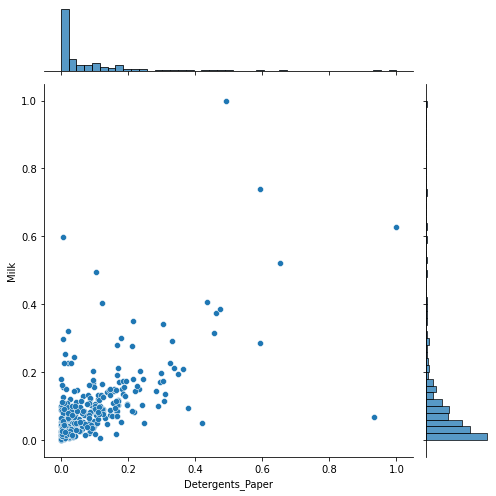

In [ ]:
g = sns.jointplot(x="Detergents_Paper",
               y="Milk",
               kind='scatter',
               hue = None,
               height=7,
               data=XW)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=6)
dbscan_labels = dbscan.fit_predict(XW)


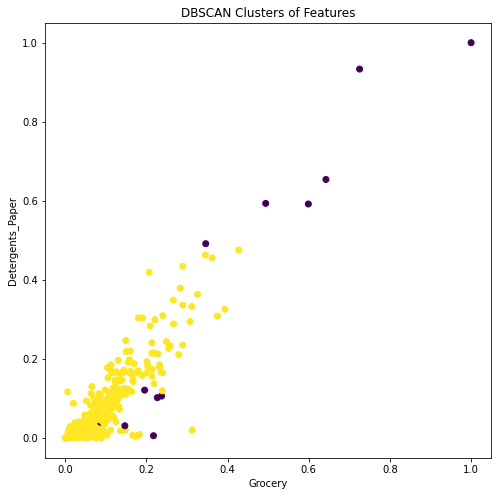

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(XW['Grocery'], XW["Detergents_Paper"], c = dbscan_labels )
plt.xlabel("Grocery")
plt.ylabel("Detergents_Paper")
plt.title("DBSCAN Clusters of Features")
plt.show()

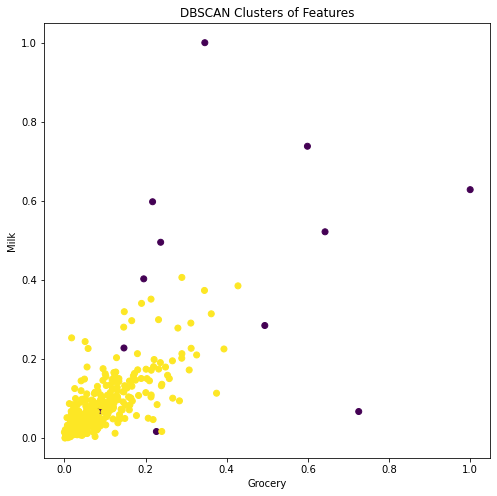

In [77]:
plt.figure(figsize=(8,8))
plt.scatter(XW['Grocery'], XW["Milk"], c = dbscan_labels )
plt.xlabel("Grocery")
plt.ylabel("Milk")
plt.title("DBSCAN Clusters of Features")
plt.show()

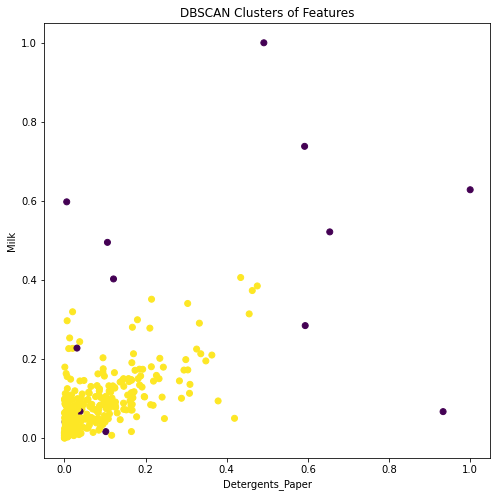

In [78]:
plt.figure(figsize=(8,8))
plt.scatter(XW["Detergents_Paper"],XW['Milk'], c = dbscan_labels )
plt.xlabel("Detergents_Paper")
plt.ylabel("Milk")
plt.title("DBSCAN Clusters of Features")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2,n_init=20)
kmeans_labels = kmeans.fit_predict(XW)

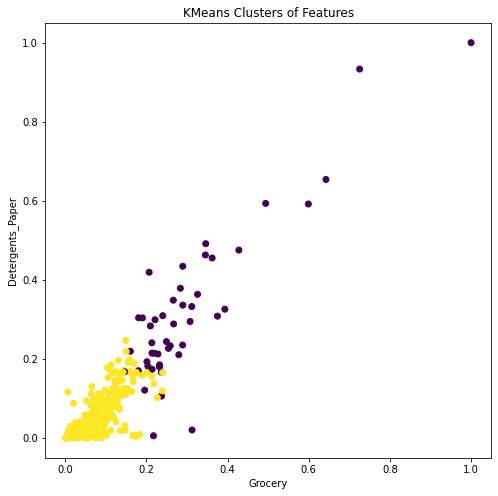

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(XW['Grocery'], XW["Detergents_Paper"], c = kmeans_labels )
plt.xlabel("Grocery")
plt.ylabel("Detergents_Paper")
plt.title("KMeans Clusters of Features")
plt.show()

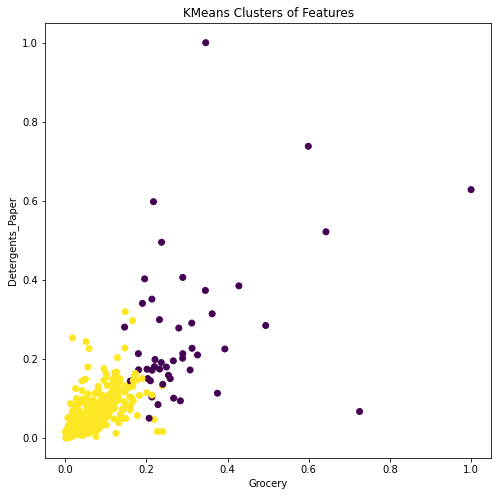

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(XW['Grocery'], XW["Milk"], c = kmeans_labels )
plt.xlabel("Grocery")
plt.ylabel("Detergents_Paper")
plt.title("KMeans Clusters of Features")
plt.show()

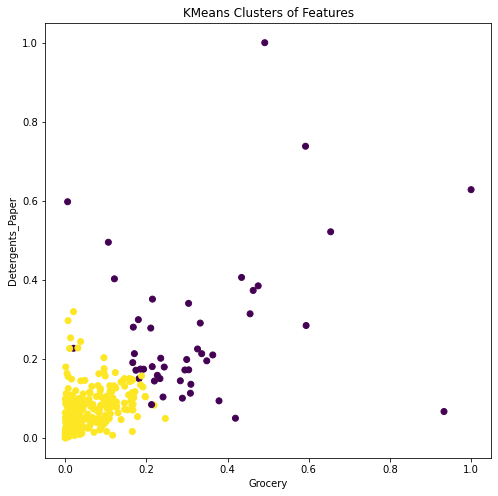

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(XW["Detergents_Paper"],XW['Milk'], c = kmeans_labels )
plt.xlabel("Grocery")
plt.ylabel("Detergents_Paper")
plt.title("KMeans Clusters of Features")
plt.show()

In [ ]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=2000, noise=0.1, random_state=42)

X1 = np.random.uniform(-2, 3, size=400)
X2 = np.random.uniform(-1, 2, size=400)

X1 = pd.DataFrame(X1)
X1[1] = X2
Xm = np.concatenate([Xm,X1.values])

y = np.random.randint(0,2,size = 400)
ym = np.concatenate([ym,y])

In [ ]:
Xm_df = pd.DataFrame(Xm)
Xm_df['y'] = ym
Xm_df

,0,1,y
0,1.776507,0.192752,1
1,0.397809,0.930390,0
2,0.495308,-0.318321,1
3,-0.948944,0.163020,0
4,0.484957,-0.338160,1
...,...,...,...
2395,-0.841957,0.616907,1
2396,-0.201342,-0.697931,0
2397,2.702498,1.733036,1
2398,0.001949,-0.404923,1


<Figure size 720x720 with 0 Axes>

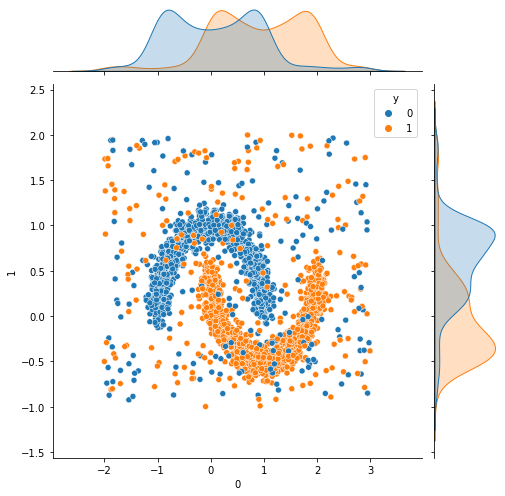

In [ ]:
plt.figure(figsize=(10, 10))
g = sns.jointplot(x=0,
                  y=1,
                  hue = 'y',
                  height=7,
                  data= Xm_df)

In [ ]:
Xm1 = Xm_df.drop(columns=['y'],axis =1)

db = DBSCAN(eps=0.1 ,min_samples=7)
db_labels = db.fit_predict(Xm1)

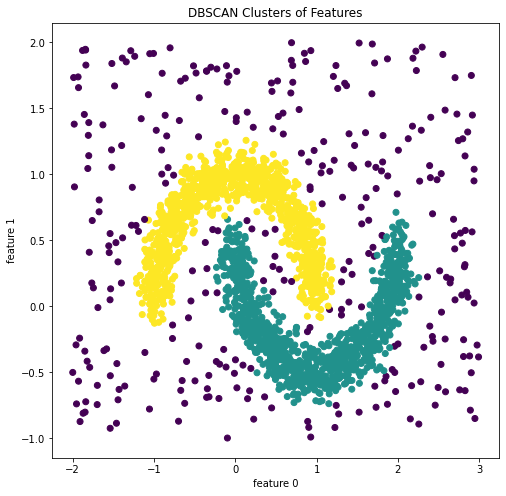

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(Xm1[0], Xm1[1], c = db_labels )
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.title("DBSCAN Clusters of Features")
plt.show()

2 clusters

In [ ]:
kmeans = KMeans(n_clusters=2,n_init=20)
kmeans_labels = kmeans.fit_predict(Xm1)

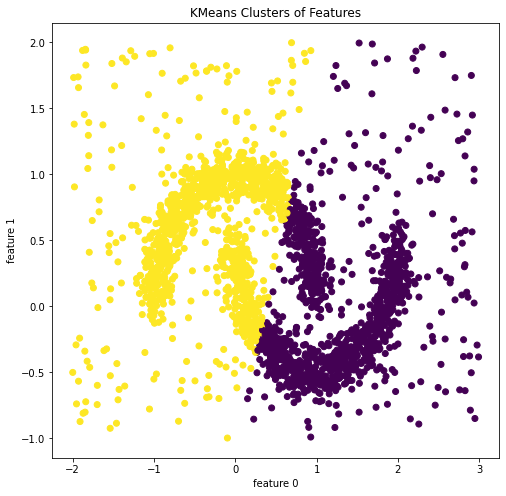

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(Xm1[0],Xm1[1], c = kmeans_labels )
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.title("KMeans Clusters of Features")
plt.show()

3 clusters

In [ ]:
kmeans1 = KMeans(n_clusters=3,n_init=20)
kmeans_labels1 = kmeans1.fit_predict(Xm1)

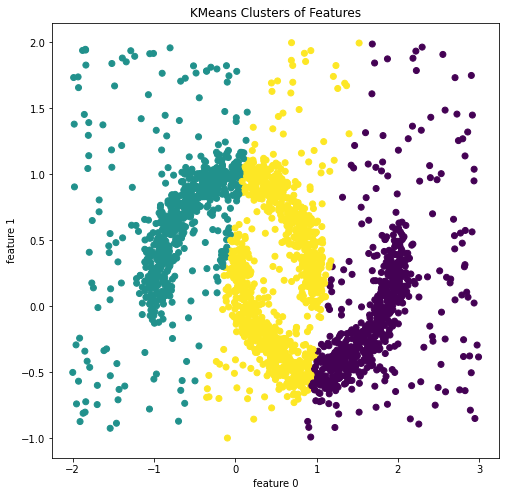

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(Xm1[0],Xm1[1], c = kmeans_labels1 )
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.title("KMeans Clusters of Features")
plt.show()